### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Importing the Linear Model in case if error arises
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score

### Loading the Data

In [2]:
my_sheet = 'abcs' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'TTHE1.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
df

,Day,Incident_code,Location_start,Location_end,Type_of_incident,terrorists_attack_force,Number_of_nationalities,First_nationality_of_terrorists,Second_nationality_of_terrorists,Third_nationality_of_terrorists,...,Threats_Carried_Out,Terrorist_Negotiation_Success,Target_Negotiator,Amount_of_Ransom_Paid,Number_of_Prisoners_Released,First_hostage_fate,Second_hostage_fate,Duration_in_Hours,Duration_in_Days,Year
0,19,4,999,999,9,99,1,850,998,998,...,9.0,9.0,9.0,0.0,0.0,99.0,98.0,99.0,999.0,1
1,3,1,92,92,2,24,1,92,999,999,...,9.0,9.0,9.0,0.0,999.0,2.0,98.0,99.0,999.0,1
2,17,2,100,100,1,99,9,999,999,999,...,0.0,3.0,5.0,0.0,0.0,14.0,98.0,96.0,5.0,1
3,21,1,92,92,1,2,9,92,999,999,...,9.0,8.0,8.0,0.0,0.0,10.0,98.0,1.0,0.0,1
4,8,1,211,211,1,99,9,999,999,999,...,9.0,8.0,8.0,0.0,0.0,98.0,98.0,99.0,999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,20,1,484,484,1,9,1,484,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10
1957,27,3,770,750,1,9,1,770,98,98,...,9.0,8.0,8.0,0.0,998.0,3.0,98.0,99.0,999.0,10
1958,20,1,501,501,1,3,1,520,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10
1959,24,2,436,436,1,24,1,475,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10


### Cleaning the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Day                                 1961 non-null   int64  
 1   Incident_code                       1961 non-null   int64  
 2   Location_start                      1961 non-null   int64  
 3   Location_end                        1961 non-null   int64  
 4   Type_of_incident                    1961 non-null   int64  
 5   terrorists_attack_force             1961 non-null   int64  
 6   Number_of_nationalities             1961 non-null   int64  
 7   First_nationality_of_terrorists     1961 non-null   int64  
 8   Second_nationality_of_terrorists    1961 non-null   int64  
 9   Third_nationality_of_terrorists     1961 non-null   int64  
 10  Number_of_nationalities_of_victims  1961 non-null   int64  
 11  First_victim_nationality            1961 no

In [4]:
df.dtypes

Day                                     int64
Incident_code                           int64
Location_start                          int64
Location_end                            int64
Type_of_incident                        int64
terrorists_attack_force                 int64
Number_of_nationalities                 int64
First_nationality_of_terrorists         int64
Second_nationality_of_terrorists        int64
Third_nationality_of_terrorists         int64
Number_of_nationalities_of_victims      int64
First_victim_nationality                int64
Second_victim_nationality               int64
Third_victim_nationality                int64
Number_of_US_victims                    int64
Type_of_US_victims                      int64
Type_of_immediate_victims               int64
Total_individuals_wounded               int64
Terrorists_wounded                      int64
Total_number_of_individuals_killed      int64
Terrorists_killed                       int64
Type_of_Weapon_used               

In [5]:
# Dropping Null Columns
for col in df.columns:
    if df[col].isnull().mean()*100>40:
        df.drop(col,axis=1,inplace=True)

In [6]:
df # Checking the Database

,Day,Incident_code,Location_start,Location_end,Type_of_incident,terrorists_attack_force,Number_of_nationalities,First_nationality_of_terrorists,Second_nationality_of_terrorists,Third_nationality_of_terrorists,...,Threats_Carried_Out,Terrorist_Negotiation_Success,Target_Negotiator,Amount_of_Ransom_Paid,Number_of_Prisoners_Released,First_hostage_fate,Second_hostage_fate,Duration_in_Hours,Duration_in_Days,Year
0,19,4,999,999,9,99,1,850,998,998,...,9.0,9.0,9.0,0.0,0.0,99.0,98.0,99.0,999.0,1
1,3,1,92,92,2,24,1,92,999,999,...,9.0,9.0,9.0,0.0,999.0,2.0,98.0,99.0,999.0,1
2,17,2,100,100,1,99,9,999,999,999,...,0.0,3.0,5.0,0.0,0.0,14.0,98.0,96.0,5.0,1
3,21,1,92,92,1,2,9,92,999,999,...,9.0,8.0,8.0,0.0,0.0,10.0,98.0,1.0,0.0,1
4,8,1,211,211,1,99,9,999,999,999,...,9.0,8.0,8.0,0.0,0.0,98.0,98.0,99.0,999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,20,1,484,484,1,9,1,484,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10
1957,27,3,770,750,1,9,1,770,98,98,...,9.0,8.0,8.0,0.0,998.0,3.0,98.0,99.0,999.0,10
1958,20,1,501,501,1,3,1,520,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10
1959,24,2,436,436,1,24,1,475,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10


In [7]:
df.isna().sum()  # Sum of Null Values

Day                                   0
Incident_code                         0
Location_start                        0
Location_end                          0
Type_of_incident                      0
terrorists_attack_force               0
Number_of_nationalities               0
First_nationality_of_terrorists       0
Second_nationality_of_terrorists      0
Third_nationality_of_terrorists       0
Number_of_nationalities_of_victims    0
First_victim_nationality              0
Second_victim_nationality             0
Third_victim_nationality              0
Number_of_US_victims                  0
Type_of_US_victims                    0
Type_of_immediate_victims             0
Total_individuals_wounded             0
Terrorists_wounded                    0
Total_number_of_individuals_killed    0
Terrorists_killed                     0
Type_of_Weapon_used                   0
Terrorist_logistical_success          0
Number_of_Hostages                    0
Escaped_Hostages                      0


In [8]:
# Filling the Null Values
for i in df.columns:
    if df[i].dtypes=="object":
        df[i].fillna(df[i].mode()[0],inplace=True) # Mode is most common Value 
    else:
        df[i].fillna(df[i].median(),inplace=True) # Median is the Middle Value

In [9]:
df.isna().sum() # Updated Sum of Null Values

Day                                   0
Incident_code                         0
Location_start                        0
Location_end                          0
Type_of_incident                      0
terrorists_attack_force               0
Number_of_nationalities               0
First_nationality_of_terrorists       0
Second_nationality_of_terrorists      0
Third_nationality_of_terrorists       0
Number_of_nationalities_of_victims    0
First_victim_nationality              0
Second_victim_nationality             0
Third_victim_nationality              0
Number_of_US_victims                  0
Type_of_US_victims                    0
Type_of_immediate_victims             0
Total_individuals_wounded             0
Terrorists_wounded                    0
Total_number_of_individuals_killed    0
Terrorists_killed                     0
Type_of_Weapon_used                   0
Terrorist_logistical_success          0
Number_of_Hostages                    0
Escaped_Hostages                      0


In [10]:
df  # Checking the Database 

,Day,Incident_code,Location_start,Location_end,Type_of_incident,terrorists_attack_force,Number_of_nationalities,First_nationality_of_terrorists,Second_nationality_of_terrorists,Third_nationality_of_terrorists,...,Threats_Carried_Out,Terrorist_Negotiation_Success,Target_Negotiator,Amount_of_Ransom_Paid,Number_of_Prisoners_Released,First_hostage_fate,Second_hostage_fate,Duration_in_Hours,Duration_in_Days,Year
0,19,4,999,999,9,99,1,850,998,998,...,9.0,9.0,9.0,0.0,0.0,99.0,98.0,99.0,999.0,1
1,3,1,92,92,2,24,1,92,999,999,...,9.0,9.0,9.0,0.0,999.0,2.0,98.0,99.0,999.0,1
2,17,2,100,100,1,99,9,999,999,999,...,0.0,3.0,5.0,0.0,0.0,14.0,98.0,96.0,5.0,1
3,21,1,92,92,1,2,9,92,999,999,...,9.0,8.0,8.0,0.0,0.0,10.0,98.0,1.0,0.0,1
4,8,1,211,211,1,99,9,999,999,999,...,9.0,8.0,8.0,0.0,0.0,98.0,98.0,99.0,999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,20,1,484,484,1,9,1,484,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10
1957,27,3,770,750,1,9,1,770,98,98,...,9.0,8.0,8.0,0.0,998.0,3.0,98.0,99.0,999.0,10
1958,20,1,501,501,1,3,1,520,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10
1959,24,2,436,436,1,24,1,475,98,98,...,9.0,9.0,9.0,9999.0,998.0,99.0,98.0,99.0,999.0,10


### Data Predictions

### 1) For the "type of Incident"

In [11]:
# For Type of incident
x = df.iloc[:,0:47] # Whole Dataset
y = df.iloc[:,4] # Type of incident that we are choosing for the feature for SVM

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
# Stratifying the feature to be analysed

In [13]:
# Fitting the Data in the ML Model
c = StandardScaler()
c.fit(X_train)

StandardScaler()

In [14]:
X_train = c.transform(X_train)
X_test = c.transform(X_test)

In [15]:
x = svm.SVC(kernel='linear') # We are making another kernel for the testing of data and making the data unit variable
x.fit(X_test,y_test)

SVC(kernel='linear')

In [16]:
predict1 = x.predict(X_test)
predict1

array([ 1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  9,  1,  1,  9,  9,  1,  1,  1,  9,  1,  1,  9,  1,
        9,  9,  1,  1,  1,  1,  1,  1,  1,  9,  9,  1,  1,  1,  1,  9, 10,
        1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2, 10,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  9,  9,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  9,  1,  1,  2,  9,  1, 10,  1,  2,  1,  1,  1,  9,  1,  1,  2,
        1,  2,  9,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,
        2,  1,  1,  1,  1,  9,  1, 10,  1,  1,  1,  1,  1,  9,  1,  1,  1,
        1, 10,  1,  1,  9,  1,  2,  1,  1,  9,  1,  1,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1,  9,  1,  1,  1,  9,  1,  1,  9,  1,  1,  9,  1,
        1,  9,  9,  2,  9

In [17]:
# Checking the Accuracy
g = metrics.accuracy_score(predict1,y_test)  # metrics.accuracy_score(prediction,test dataset)
print("Accuracy of the Type of Incident Predictions is :",round(g*100,3),"%")

Accuracy of the Type of Incident Predictions is : 99.491 %


In [18]:
# Checking the F1 Score
g = metrics.f1_score(predict1,y_test,average="micro") # metrics.f1_score(precdiction,test dataset)
print("F1 Score of Type of incident Prediction is :",round(g*100,3),"%")

F1 Score of Type of incident Prediction is : 99.491 %


In [19]:
# Confusion Matrix
g = metrics.confusion_matrix(predict1,y_test) # metrics.confusion_matrix(prediction,test dataset)
print("\u0332".join("Confusion-Matrix\n")) # Multi Class Confusion Matrix
print(g)

C̲o̲n̲f̲u̲s̲i̲o̲n̲-̲M̲a̲t̲r̲i̲x̲

[[297   2   0   0]
 [  0  25   0   0]
 [  0   0  58   0]
 [  0   0   0  11]]


In [20]:
# Specificity and Calculation of TP,TN,FP,FN values of Multi Class Confusion Matrix
TP = g[0,0] # First Cell is True Positive
FN = g[0,1]+g[0,2]+g[0,3] # First Row Except TP
FP = g[1,0]+g[2,0]+g[3,0] # First Column except TP
TN = g[1,1]+g[2,1]+g[3,1]+g[1,2]+g[2,2]+g[3,2]+g[1,3]+g[2,3]+g[3,3] # Exclude the First row and First Column
print("True Positive: ",TP)
print("False Negative: ",FN)
print("False Positive: ",FP)
print("True Negative: ",TN)
Specificity = TN/(TN+FP)
print("Specificity: ",Specificity) # Best is 1.0 , worst is 0.0

True Positive:  297
False Negative:  2
False Positive:  0
True Negative:  94
Specificity:  1.0


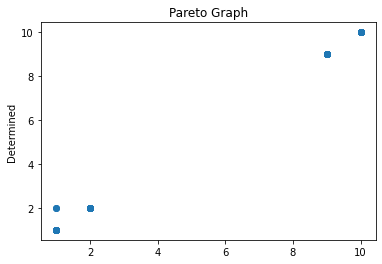

In [21]:
# Pareto Graph
plt.scatter(predict1,y_test)
plt.ylabel("Determined")
plt.title("Pareto Graph")
plt.show()

Accuracy of the Type of Incident Predictions is : 99.491 %
F1 Score of Type of incident Prediction is : 99.491 %
C̲o̲n̲f̲u̲s̲i̲o̲n̲-̲M̲a̲t̲r̲i̲x̲

[[297   2   0   0]
 [  0  25   0   0]
 [  0   0  58   0]
 [  0   0   0  11]]
True Positive:  297
False Negative:  2
False Positive:  0
True Negative:  94
Specificity:  1.0


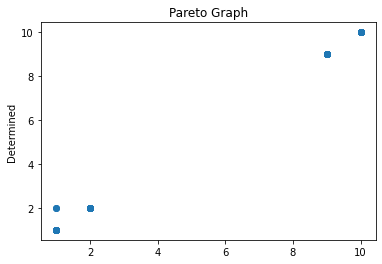

In [22]:
# Python Program for the Process
import pandas as pd
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Importing the Linear Model in case if error arises
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score
my_sheet = 'abcs' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'TTHE1.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
# Dropping Null Columns
for col in df.columns:
    if df[col].isnull().mean()*100>40:
        df.drop(col,axis=1,inplace=True)
# Filling the Null Values
for i in df.columns:
    if df[i].dtypes=="object":
        df[i].fillna(df[i].mode()[0],inplace=True) # Mode is most common Value 
    else:
        df[i].fillna(df[i].median(),inplace=True) # Median is the Middle Value
# For Type of incident
x = df.iloc[:,0:47] # Whole Dataset
y = df.iloc[:,4] # Type of incident that we are choosing for the feature for SVM
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
# Stratifying the feature to be analysed
# Fitting the Data in the ML Model
c = StandardScaler()
c.fit(X_train)
X_train = c.transform(X_train)
X_test = c.transform(X_test)
x = svm.SVC(kernel='linear') # We are making another kernel for the testing of data and making the data unit variable
x.fit(X_test,y_test)
predict1 = x.predict(X_test)
# Checking the Accuracy
g = metrics.accuracy_score(predict1,y_test)  # metrics.accuracy_score(prediction,test dataset)
print("Accuracy of the Type of Incident Predictions is :",round(g*100,3),"%")
# Checking the F1 Score
g = metrics.f1_score(predict1,y_test,average="micro") # metrics.f1_score(precdiction,test dataset)
print("F1 Score of Type of incident Prediction is :",round(g*100,3),"%")
# Confusion Matrix
g = metrics.confusion_matrix(predict1,y_test) # metrics.confusion_matrix(prediction,test dataset)
print("\u0332".join("Confusion-Matrix\n")) # Multi Class Confusion Matrix
print(g)
# Specificity and Calculation of TP,TN,FP,FN values of Multi Class Confusion Matrix
TP = g[0,0] # First Cell is True Positive
FN = g[0,1]+g[0,2]+g[0,3] # First Row Except TP
FP = g[1,0]+g[2,0]+g[3,0] # First Column except TP
TN = g[1,1]+g[2,1]+g[3,1]+g[1,2]+g[2,2]+g[3,2]+g[1,3]+g[2,3]+g[3,3] # Exclude the First row and First Column
print("True Positive: ",TP)
print("False Negative: ",FN)
print("False Positive: ",FP)
print("True Negative: ",TN)
Specificity = TN/(TN+FP)
print("Specificity: ",Specificity) # Best is 1.0 , worst is 0.0
# Pareto Graph
plt.scatter(predict1,y_test)
plt.ylabel("Determined")
plt.title("Pareto Graph")
plt.show()